# Generate trial-by-trial model predictions

Natalia Vélez, March 2022

In [1]:
%matplotlib inline
import sys, pprint
import numpy as np
import pandas as pd
import teaching_models as teach
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, entropy

sys.path.append('..')
from utils import gsearch, int_extract, read_json

sns.set_context('talk')
sns.set_style('white')

Loading teaching problems
{'A': [[0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0]],
 'B': [[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'C': [[0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'D': [[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]}
Participants excluded from analysis:
[3, 17]
Cleaning up human behavioral data
    subject  run  block_idx  ex_idx first_movement   start  problem  \
0         1    1          0       0         [0, 1]  [0, 0]       22   
1         1    1          0       1         [0, 1]  [0, 0]       22   
3         1    1          1   

## First-level model

### Generate trial-by-trial parametric regressors

Find MLE files:

In [2]:
param_files = gsearch('outputs/fit_model-literal_pref_cost_method-optimize/*.json')
param_files.sort()

print(f'Found {len(param_files)} files')
print(*param_files[:10], sep='\n')
print('...')

Found 28 files
outputs/fit_model-literal_pref_cost_method-optimize/sub-01_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-02_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-04_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-05_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-06_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-07_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-08_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-09_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-10_model-literal_pref_cost_method-optimiz

Load MLE:

In [3]:
weights = {}

for f in param_files:
    # read model-fitting results
    res = read_json(f)

    # save subject, param values
    sub = int_extract('(?<=sub-)[0-9]{2}', f)
    sub_w = np.array(res['x'])

    weights[sub] = sub_w
    
pprint.pprint(weights)

{1: array([ 1.82817811, 27.02367259,  3.09996033]),
 2: array([ 2.93582737, 10.84129804,  3.09241715]),
 4: array([ 3.02541799, 24.08486299,  4.42482386]),
 5: array([1.58431936, 9.03516123, 2.77290498]),
 6: array([ 2.14723995, 31.62239059,  3.22420624]),
 7: array([ 0.89303014, 23.52348114,  1.4069741 ]),
 8: array([ 1.67358746, 23.63586997,  2.56537642]),
 9: array([ 1.68808939, 14.16766771,  2.91869514]),
 10: array([ 1.91700151, 15.54988845,  4.55364732]),
 11: array([ 5.42469552, 26.7638664 ,  1.04218058]),
 12: array([ 3.34753509, 19.00975754,  2.76940926]),
 13: array([ 3.94754726, 29.31597243,  2.59062093]),
 14: array([ 1.49093859, 12.12236608,  5.7558849 ]),
 15: array([ 1.75628696, 25.93586917,  4.83036456]),
 16: array([ 2.57308766, 26.52883507,  3.88566172]),
 18: array([ 1.58594772, 32.1620559 ,  5.1922724 ]),
 19: array([ 3.06169235, 23.53738935,  3.90281989]),
 20: array([ 3.99483059, 28.30159365,  5.30695216]),
 21: array([1.36054779, 7.88487761, 1.35445794]),
 22: ar

Main loop: Use parameter values, behavioral data to generate trial-by-trial predictions

In [4]:
model_list = []

for sub, sub_data in teach.human_df.groupby('subject'):
    print('===== sub-%02d =====' % sub)
    # get subject-specific weights
    sub_w = weights[sub]

    for prob, prob_data in sub_data.groupby('problem'):
        preds = teach.utility_model_predictions(data=prob_data, 
                                                sampling_fun=teach.strong_sampling,
                                                pref_fun=teach.edge_pref, 
                                                weights=sub_w)
        model_list += preds

===== sub-01 =====
===== sub-02 =====
===== sub-04 =====
===== sub-05 =====
===== sub-06 =====
===== sub-07 =====
===== sub-08 =====
===== sub-09 =====
===== sub-10 =====
===== sub-11 =====
===== sub-12 =====
===== sub-13 =====
===== sub-14 =====
===== sub-15 =====
===== sub-16 =====
===== sub-18 =====
===== sub-19 =====
===== sub-20 =====
===== sub-21 =====
===== sub-22 =====
===== sub-23 =====
===== sub-24 =====
===== sub-25 =====
===== sub-26 =====
===== sub-27 =====
===== sub-28 =====
===== sub-29 =====
===== sub-30 =====


(New) Compute KL divergence in a way that's consistent with empirically-derived KL

In [5]:
def clean_ph(raw):
    '''
    Helper function: Extract belief distribution
    '''
    return np.array([r[1] for r in raw])

# Clean up belief distribution
model_raw = pd.DataFrame(model_list)
model_raw['pH'] = model_raw.pH.apply(clean_ph)

kl_list = []
# Compute KL divergence with an adjustment for small probabilities
for name,group in model_raw.groupby(['subject', 'problem']):
    prior = np.ones(4)/4 # start with a uniform prior
    
    for _, row in group.iterrows():
        pH_adjusted = row.pH + 0.0001 # small adjustment to fix divide-by-0 error
        belief = pH_adjusted/np.sum(pH_adjusted)
        kl = entropy(prior, belief)
        
        prior = belief # carry over belief dist from prior trial
        kl_list.append(kl)
model_raw['KL'] = kl_list

model_raw.head()

,subject,run,block_idx,ex_idx,first_movement,start,problem,order,example,cursor_coords,example_coords,cursor,model,lik,pD,pTrue,pH,entropy,delta,KL
0,1,7,2,0,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",33,"[0, 5]","[5, 3]",5,utility,0.021884,"[(0, 0.0), (1, 0.0), (2, 0.07562020028806003),...",0.500000,"[0.5, 0.0, 0.0, 0.5]",0.693147,0.250000,3.565749
1,1,7,2,1,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",32,"[5, 3]","[5, 2]",33,utility,0.063745,"[(0, 0.0), (1, 0.0), (2, 0.048043675620718124)...",0.500000,"[0.5, 0.0, 0.0, 0.5]",0.693147,0.000000,0.000000
2,1,7,2,2,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",2,"[5, 2]","[0, 2]",32,utility,0.070129,"[(0, 0.0), (1, 0.0), (2, 0.07012900259502372),...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.500000,3.911391
3,1,1,2,0,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",31,"[5, 5]","[5, 1]",35,utility,0.058211,"[(0, 0.0), (1, 0.025928871877114915), (2, 0.00...",0.333333,"[0.3333333333333333, 0.3333333333333333, 0.333...",1.098612,0.083333,1.740425
4,1,1,2,1,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",1,"[5, 1]","[0, 1]",31,utility,0.111730,"[(0, 0.0), (1, 0.1117299061701328), (2, 0.0192...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.666667,5.041377


Save model predictions to dataframe:

In [6]:
param_reg = ['pTrue', 'entropy', 'delta', 'KL']
# convert to df
model_df = model_raw.copy()
model_df = model_df[['subject', 'run', 'block_idx', 'ex_idx', 'problem', 'pH'] + param_reg]
model_df['pH'] = model_df.pH.apply(list)

# mean-center parametric regressors
def mean_center(col):
    means = model_df.groupby('subject')[col].transform('mean')
    return model_df[col] - means

for r in param_reg:
    model_df[r] = mean_center(r)

print(model_df.shape)
model_df.head()

(3213, 10)


,subject,run,block_idx,ex_idx,problem,pH,pTrue,entropy,delta,KL
0,1,7,2,0,0,"[0.5, 0.0, 0.0, 0.5]",0.040123,-0.165064,0.155093,2.341827
1,1,7,2,1,0,"[0.5, 0.0, 0.0, 0.5]",0.040123,-0.165064,-0.094907,-1.223922
2,1,7,2,2,0,"[1.0, 0.0, 0.0, 0.0]",0.540123,-0.858211,0.405093,2.687469
3,1,1,2,0,1,"[0.3333333333333333, 0.3333333333333333, 0.333...",-0.126543,0.240401,-0.011574,0.516503
4,1,1,2,1,1,"[1.0, 0.0, 0.0, 0.0]",0.540123,-0.858211,0.571759,3.817455


### Check: Correlations between parametric regressors

A priori, we planned to operationalize the learner's *belief* as the learner's posterior belief in the true hypothesis (`pTrue`), and the learner's belief update as the KL divergence in the learner's beliefs between subsequent trials (`KL`). Here, we plan to check the correlations between these parametric regressors, and compare them to two alternative operationalizations:

* `entropy`: The learner's uncertainty, measured over the full belief distribution (note this is inversely related to learner's posterior belief)
* `delta`: The change in the learner's belief in the true hypothesis between subsequent trials

Dataframe of correlations:

In [7]:
corr_df = model_df.groupby('subject')[param_reg].corr().reset_index()
corr_df = corr_df.melt(id_vars=['subject', 'level_1'], value_vars=param_reg, 
                       var_name='level_2', value_name='r')
corr_df.head()

,subject,level_1,level_2,r
0,1,pTrue,pTrue,1.000000
1,1,entropy,pTrue,-0.970113
2,1,delta,pTrue,0.620298
3,1,KL,pTrue,0.430251
4,2,pTrue,pTrue,1.000000


Plot correlations:

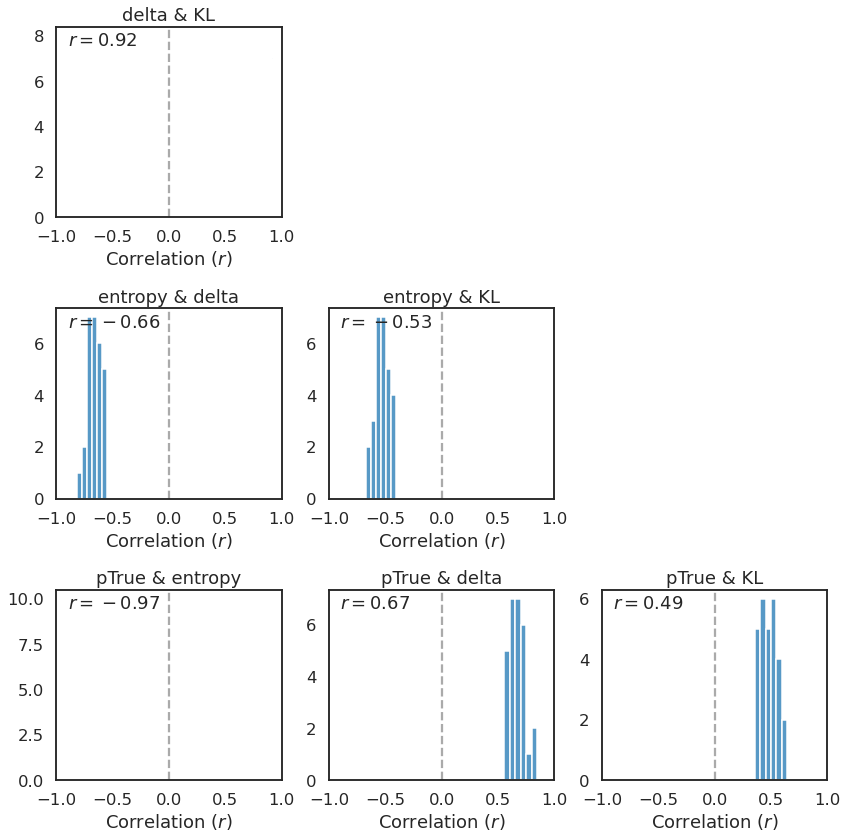

In [8]:
n_ax = len(param_reg)-1
fig,axes=plt.subplots(n_ax, n_ax, figsize=(12,12))
[ax.axis('off') for ax in axes.flatten()] # hide all panels

for i,r_i in enumerate(param_reg):
    for j,r_j in enumerate(param_reg[i+1:]):
        # Plot correlation
        group = corr_df[(corr_df.level_1 == r_i) & (corr_df.level_2 == r_j)]
        sns.histplot(group.r, ax=axes[2-i,j])
        
        # Format axes
        axes[2-i,j].set(ylabel='', xlabel=r'Correlation ($r$)', xlim=(-1,1), title = f'{r_i} & {r_j}')
        axes[2-i,j].axvline(x=0, linestyle='--', color='#aaa')
        axes[2-i,j].axis('on') # turn on used panels
        
        # Add correlation coefficient to plot
        axes[2-i,j].text(-0.9, axes[2-i,j].get_ylim()[-1]*.9, r'$r = %0.2f$' % group.r.mean())
                
fig.tight_layout()

### Save final regressors to file

In [9]:
drop_reg = ['entropy', 'delta']
out_df = (
    model_df
    .copy()
    .drop(columns=drop_reg)
    .sort_values(by=['subject', 'run', 'block_idx', 'ex_idx'])
)

out_f = 'outputs/model_regressor_values.csv'
print(f'Saving to: {out_f}')
out_df.to_csv(out_f, index=False)
out_df.head()

Saving to: outputs/model_regressor_values.csv


,subject,run,block_idx,ex_idx,problem,pH,pTrue,KL
59,1,1,0,0,22,"[0.3333333333333333, 0.3333333333333333, 0.0, ...",-0.126543,0.516503
60,1,1,0,1,22,"[0.5, 0.0, 0.0, 0.5]",0.040123,1.209600
49,1,1,1,0,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,2.341827
50,1,1,1,1,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922
51,1,1,1,2,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922
